# IPSLCM6_snow_bias_example (xarray, cartopy, xesmf)
Colormaps : https://matplotlib.org/examples/color/colormaps_reference.html

In [247]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point
import holoviews as hv
import xesmf as xe

import sys
sys.path.insert(1, '../')
import utils as u
u.check_python_version()
u.check_virtual_memory()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 194 GB / percent used: 22.9 %


## Loading NOAA (2.0x1.75) reference dataset and selecting period

In [194]:
!ncdump -h '/home/msantola/TP_CLiMAF/ReferenceSNOW/SNC/SNCRefData/snowc.mon.noaaV2c_185101_201412_2.0x1.75.nc'

netcdf snowc.mon.noaaV2c_185101_201412_2.0x1.75 {
dimensions:
	lat = 94 ;
	lon = 192 ;
	time = UNLIMITED ; // (1968 currently)
	nbnds = 2 ;
variables:
	float lat(lat) ;
		lat:actual_range = 88.542f, -88.542f ;
		lat:long_name = "Latitude" ;
		lat:standard_name = "latitude" ;
		lat:axis = "Y" ;
		lat:coordinate_defines = "point" ;
		lat:units = "degree_north" ;
	float lon(lon) ;
		lon:long_name = "Longitude" ;
		lon:actual_range = 0.f, 358.125f ;
		lon:standard_name = "longitude" ;
		lon:axis = "X" ;
		lon:coordinate_defines = "point" ;
		lon:units = "degree_east" ;
	double time_bnds(time, nbnds) ;
		time_bnds:long_name = "Time Boundaries" ;
	double time(time) ;
		time:units = "hours since 1800-1-1 00:00:0.0" ;
		time:avg_period = "0000-01-00 00:00:00" ;
		time:prev_avg_period = "0000-00-01 00:00:00" ;
		time:long_name = "Time" ;
		time:delta_t = "0000-01-00 00:00:00" ;
		time:standard_name = "time" ;
		time:axis = "T" ;
		time:coordinate_defines = "start" ;
		time:actual_range = 447048

In [199]:
file_path = '/home/msantola/TP_CLiMAF/ReferenceSNOW/SNC/SNCRefData/snowc.mon.noaaV2c_185101_201412_2.0x1.75.nc'

ds = xr.open_dataset(file_path)
ds

<xarray.Dataset>
Dimensions:    (lat: 94, lon: 192, nbnds: 2, time: 1968)
Coordinates:
  * lat        (lat) float32 88.542 86.6531 84.7532 ... -86.6531 -88.542
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 354.375 356.25 358.125
  * time       (time) datetime64[ns] 1851-01-01 1851-02-01 ... 2014-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    snowc      (time, lat, lon) float32 ...
Attributes:
    Conventions:             CF-1.2
    title:                   4x Daily NOAA-CIRES 20th Century Reanalysis V2c
    platform:                Model
    institution:             NOAA ESRL Physical Sciences Division & CU/CIRES ...
    citation:                Compo,G.P. <http://www.esrl.noaa.gov/psd/people/...
    version:                 2c
    contact:                 esrl.psd.data@noaa.gov
    source:                  20CRv2c 2014, Ensemble Kalman Filter, ocean (spe...
    forcing_note:            Additional information on the exte

In [200]:
y_start = '1984'
y_end = '2014'

In [201]:
snowc_mon_noaaV2c = ds.snowc.sel(time=slice(y_start, y_end))
snowc_mon_noaaV2c

<xarray.DataArray 'snowc' (time: 372, lat: 94, lon: 192)>
[6713856 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * time     (time) datetime64[ns] 1984-01-01 1984-02-01 ... 2014-12-01
Attributes:
    long_name:         Monthly Snow Cover at Surface
    cell_methods:      time: mean (monthly from 3-hourly values)
    units:             %
    precision:         2
    GRIB_id:           238
    GRIB_name:         SNOWC
    var_desc:          snow cover
    dataset:           NOAA-CIRES 20th Century Reanalysis version 2c Monthly ...
    level_desc:        Surface
    statistic:         Ensemble Mean
    parent_stat:       Individual Obs
    standard_name:     
    valid_range:       [  0. 100.]
    statistic_method:  Ensemble mean is calculated by averaging over all 56 e...
    GridType:          Cylindrical Equidistant Projection Grid


### Display animation

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

/home/mlalande/miniconda3/lib/python3.7/site-packages/holoviews/plotting/mpl/raster.py:161: MatplotlibDeprecationWarning: 
The set_norm function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_norm instead.
  colorbar.set_norm(artist.norm)
/home/mlalande/miniconda3/lib/python3.7/site-packages/holoviews/plotting/mpl/raster.py:165: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  colorbar.set_clim(artist.get_clim())
/home/mlalande/miniconda3/lib/python3.7/site-packages/holoviews/plotting/mpl/raster.py:161: MatplotlibDeprecationWarning: 
The set_norm function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_norm instead.
  colorbar.set_norm(artist.norm)
/home/mlalande/miniconda3/lib/python3.7/site-packages/holoviews/plotting/mpl/raster.py:165: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Mat

/home/mlalande/miniconda3/lib/python3.7/site-packages/holoviews/plotting/mpl/raster.py:161: MatplotlibDeprecationWarning: 
The set_norm function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_norm instead.
  colorbar.set_norm(artist.norm)
/home/mlalande/miniconda3/lib/python3.7/site-packages/holoviews/plotting/mpl/raster.py:165: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  colorbar.set_clim(artist.get_clim())
/home/mlalande/miniconda3/lib/python3.7/site-packages/holoviews/plotting/mpl/raster.py:161: MatplotlibDeprecationWarning: 
The set_norm function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_norm instead.
  colorbar.set_norm(artist.norm)
/home/mlalande/miniconda3/lib/python3.7/site-packages/holoviews/plotting/mpl/raster.py:165: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Mat

:HoloMap   [time]
   :QuadMesh   [lon,lat]   (snowc)
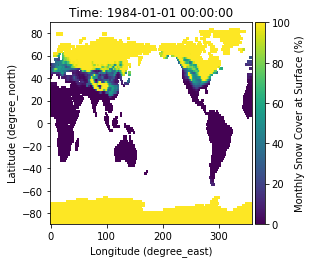
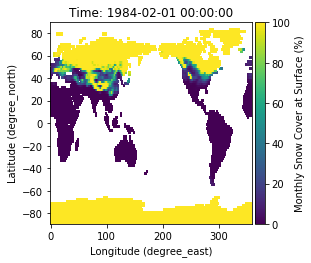
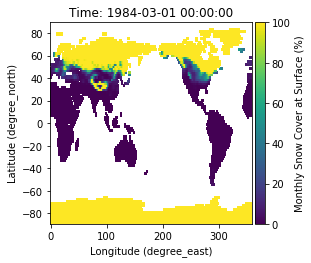
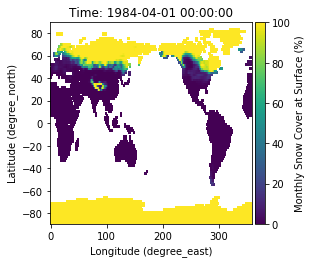
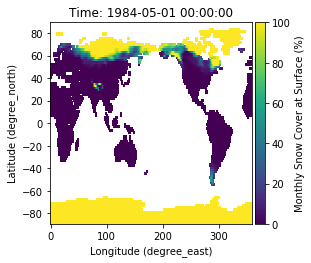
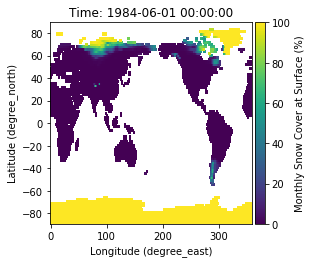
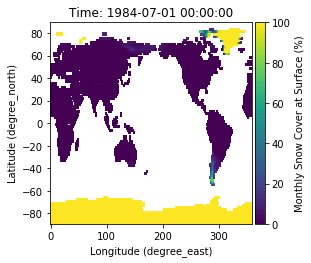
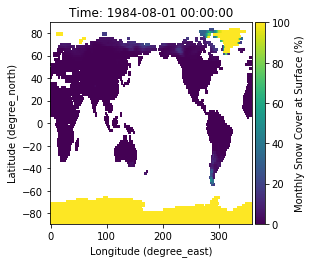
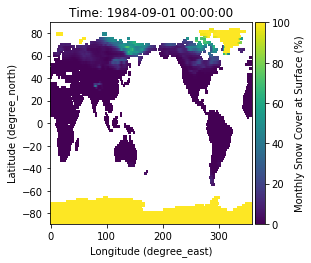
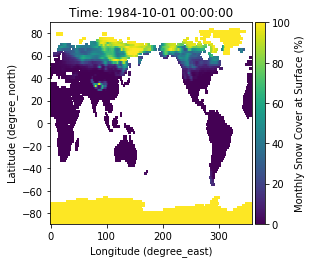
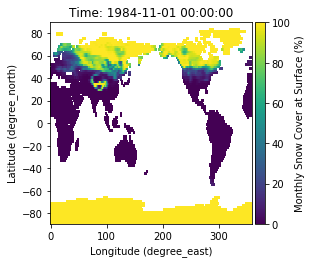
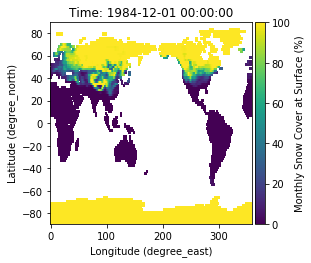
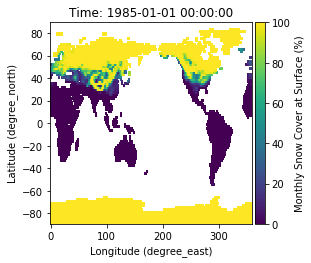
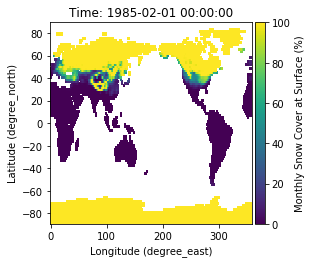
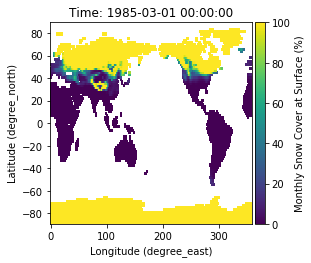
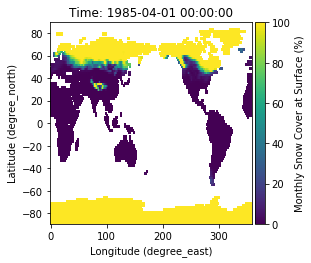
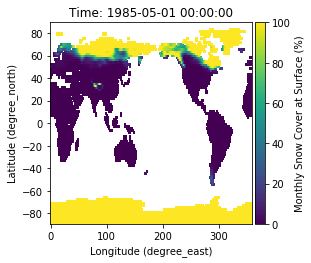
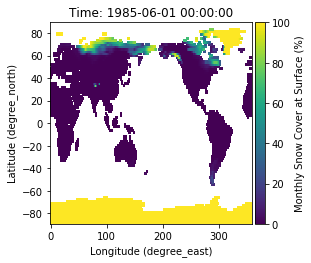
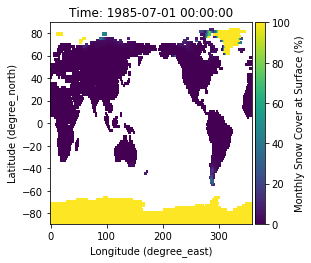
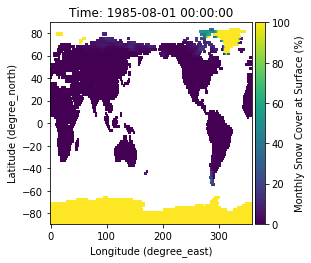

In [125]:
hv.extension('matplotlib')

animation = hv.Dataset(snowc_mon_noaaV2c[:20])
animation.to(hv.QuadMesh, ['lon', 'lat']).options(colorbar=True, cmap='viridis')

In [126]:
%matplotlib notebook

### Compute climatology

In [133]:
snowc_mon_noaaV2c

<xarray.DataArray 'snowc' (time: 372, lat: 94, lon: 192)>
[6713856 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * time     (time) datetime64[ns] 1984-01-01 1984-02-01 ... 2014-12-01
Attributes:
    long_name:         Monthly Snow Cover at Surface
    cell_methods:      time: mean (monthly from 3-hourly values)
    units:             %
    precision:         2
    GRIB_id:           238
    GRIB_name:         SNOWC
    var_desc:          snow cover
    dataset:           NOAA-CIRES 20th Century Reanalysis version 2c Monthly ...
    level_desc:        Surface
    statistic:         Ensemble Mean
    parent_stat:       Individual Obs
    standard_name:     
    valid_range:       [  0. 100.]
    statistic_method:  Ensemble mean is calculated by averaging over all 56 e...
    GridType:          Cylindrical Equidistant Projection Grid


In [180]:
clim_MA_noaaV2c_not_weighted = snowc_mon_noaaV2c.groupby('time.month').mean('time', keep_attrs=True, skipna=False)\
                                        .sel(month=slice(3,4)).mean('month', keep_attrs=True, skipna=False)
clim_MA_noaaV2c_not_weighted

<xarray.DataArray 'snowc' (lat: 94, lon: 192)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
Attributes:
    long_name:         Monthly Snow Cover at Surface
    cell_methods:      time: mean (monthly from 3-hourly values)
    units:             %
    precision:         2
    GRIB_id:           238
    GRIB_name:         SNOWC
    var_desc:          snow cover
    dataset:           NOAA-CIRES 20th Century Reanalysis version 2c Monthly ...
    level_desc:        Surface
    statistic:         Ensemble Mean
    parent_stat:       Individua

In [181]:
clim_MA_noaaV2c = u.custom_season_clim(snowc_mon_noaaV2c, 'MA', calendar='standard')
clim_MA_noaaV2c

<xarray.DataArray (lat: 94, lon: 192)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
    season   <U2 'MA'
Attributes:
    long_name:         Monthly Snow Cover at Surface
    cell_methods:      time: mean (monthly from 3-hourly values)
    units:             %
    precision:         2
    GRIB_id:           238
    GRIB_name:         SNOWC
    var_desc:          snow cover
    dataset:           NOAA-CIRES 20th Century Reanalysis version 2c Monthly ...
    level_desc:        Surface
    statistic:         Ensemble Mean
    parent_stat:       Individual

<IPython.core.display.Javascript object>


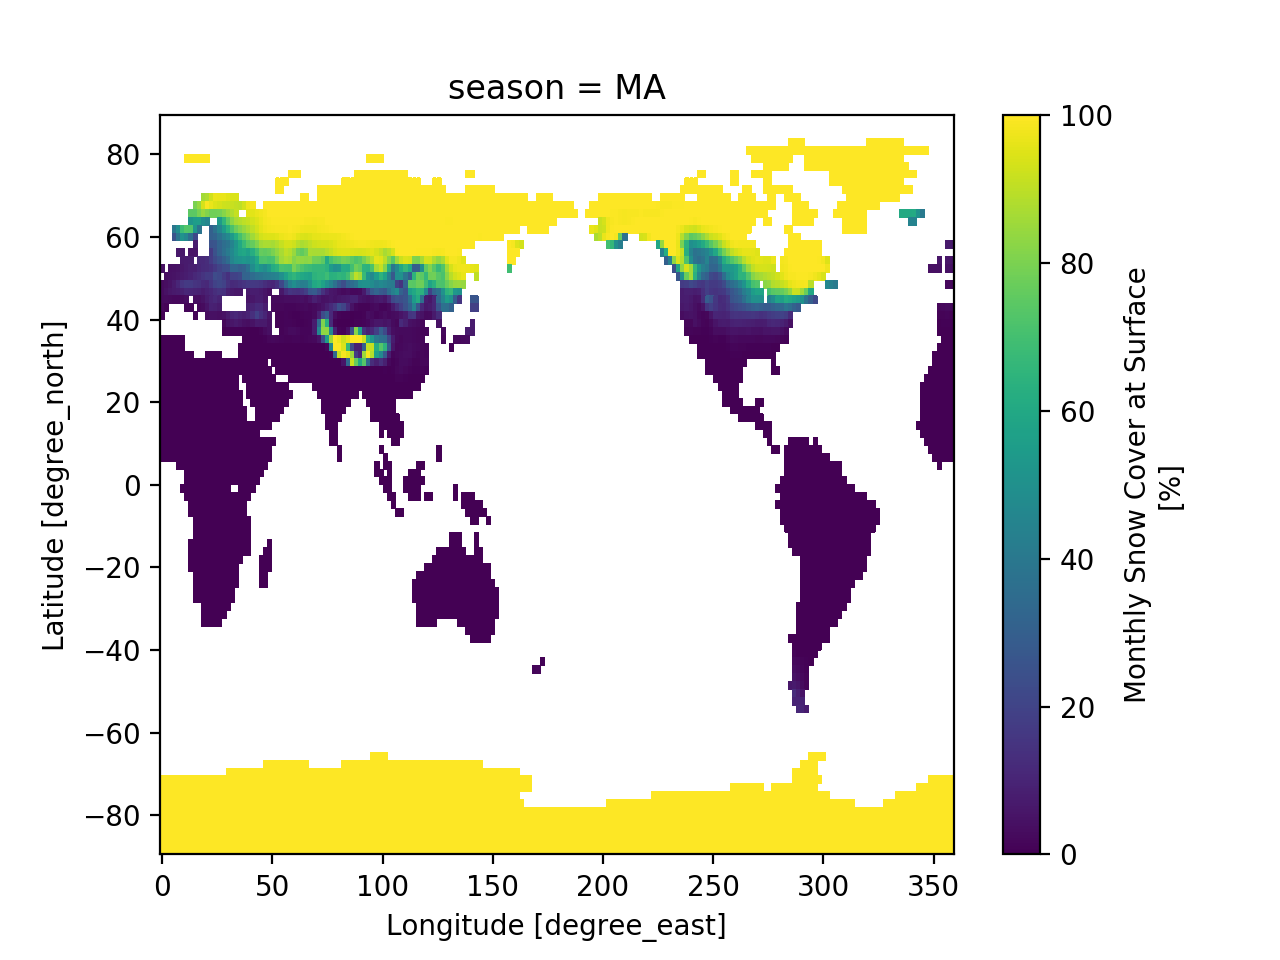

In [182]:
plt.figure()
clim_MA_noaaV2c.plot()

<IPython.core.display.Javascript object>


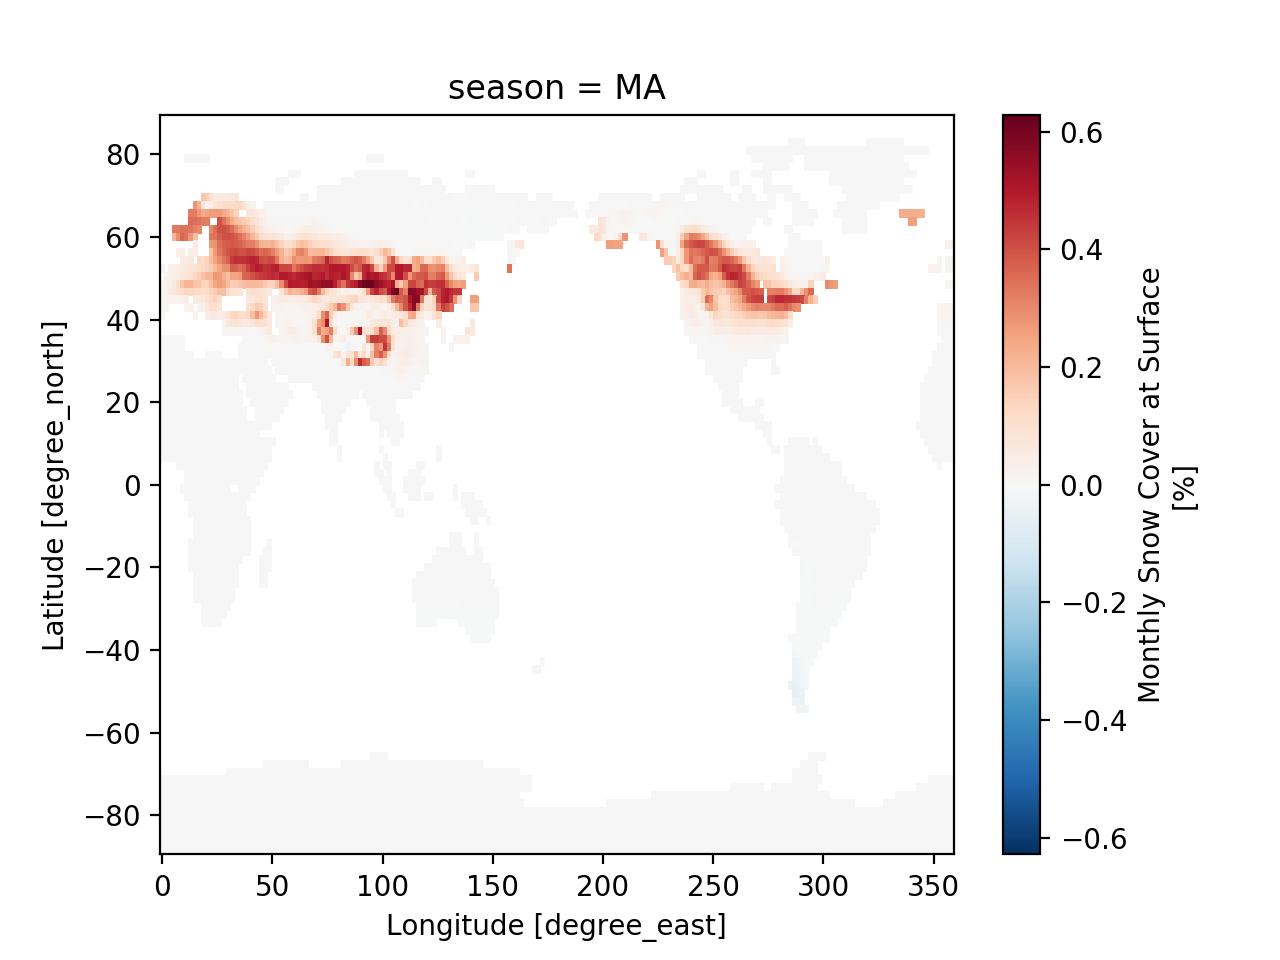

In [183]:
plt.figure()
with xr.set_options(keep_attrs=True):
    diff = clim_MA_noaaV2c - clim_MA_noaaV2c_not_weighted
diff.plot()

About 1% error. Not too bad.

### Advance plot

<IPython.core.display.Javascript object>


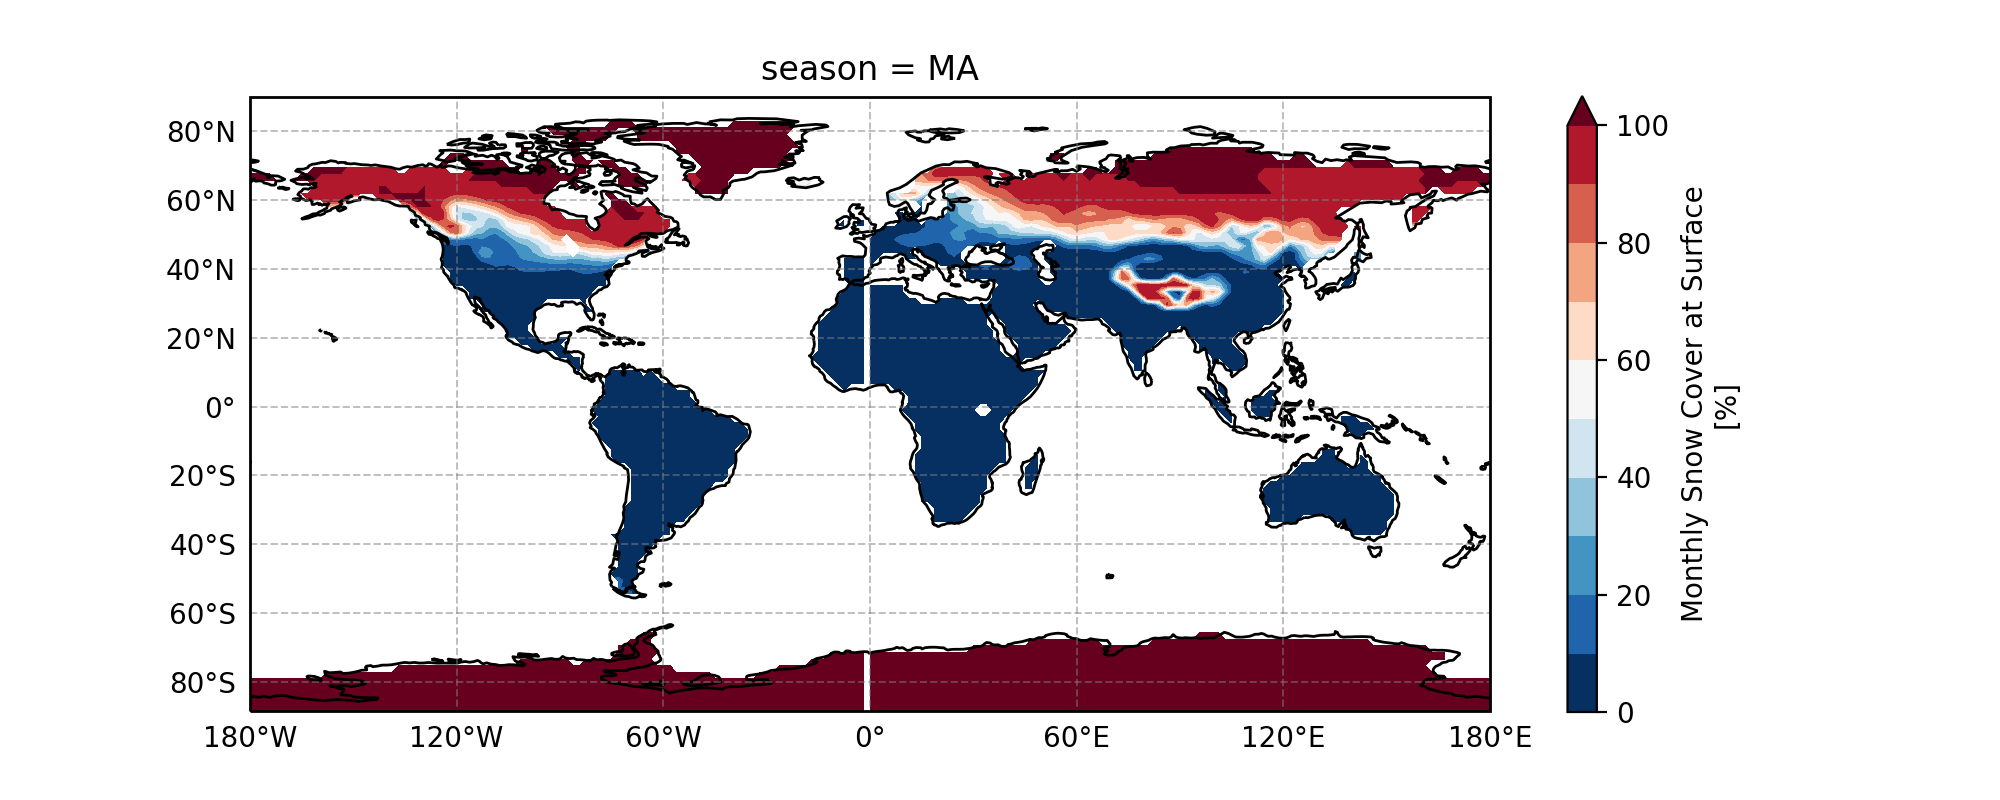

In [184]:
plt.figure(figsize=(10,4))

ax = plt.axes(projection=ccrs.PlateCarree())

clim_MA_noaaV2c.plot.contourf(
    ax=ax, transform=ccrs.PlateCarree(), levels=np.arange(0,110,10), cmap='RdBu_r',
#     cbar_kwargs={'orientation':'horizontal'}
)

ax.coastlines()
# ax.set_aspect('auto')

# https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

In [185]:
clim_MA_noaaV2c.max()

<xarray.DataArray ()>
array(100.)
Coordinates:
    season   <U2 'MA'

The maximum value is well 100. The contourf colorbar takes the interval \[90,100[, this explain the extend max.

http://xarray.pydata.org/en/stable/generated/xarray.plot.contourf.html

### Add cyclic point

In [186]:
cyclic_data, cyclic_lons = add_cyclic_point(clim_MA_noaaV2c.values, coord=clim_MA_noaaV2c.lon)

In [188]:
clim_MA_noaaV2c_cyclic = xr.DataArray(
    cyclic_data,
    coords={'lat': clim_MA_noaaV2c.lat, 'lon': cyclic_lons, 'season': clim_MA_noaaV2c.season},
    dims=['lat', 'lon'],
    attrs=clim_MA_noaaV2c.attrs
)

<IPython.core.display.Javascript object>


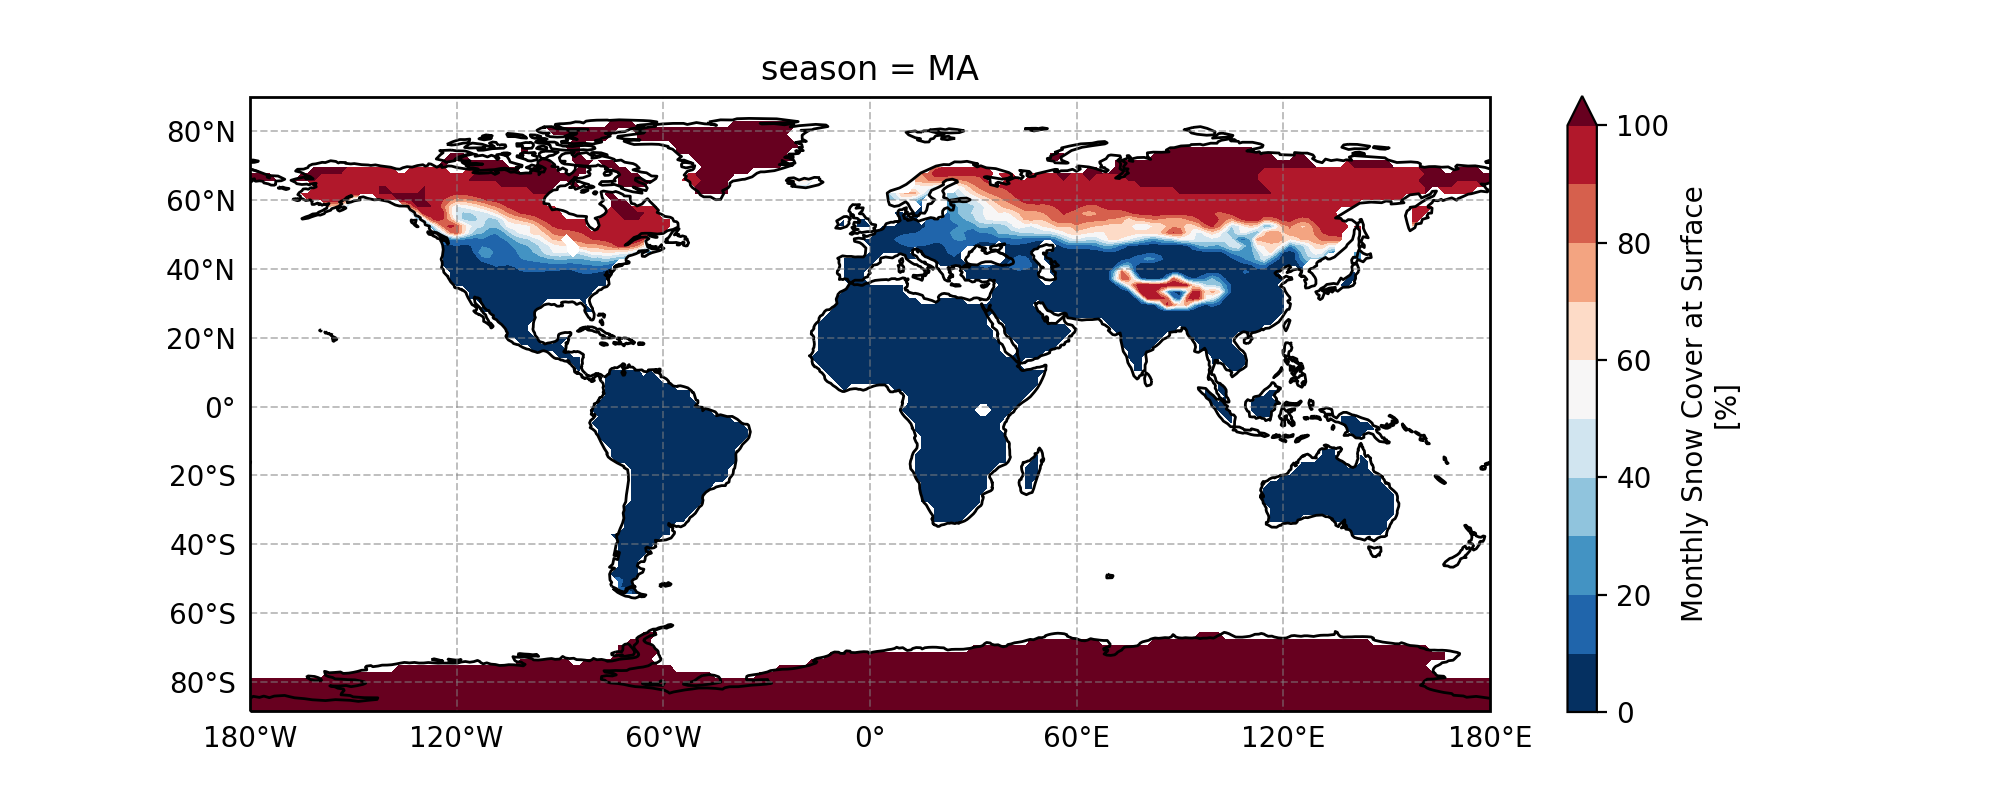

In [189]:
plt.figure(figsize=(10,4))

ax = plt.axes(projection=ccrs.PlateCarree())

clim_MA_noaaV2c_cyclic.plot.contourf(
    ax=ax, transform=ccrs.PlateCarree(), levels=np.arange(0,110,10), cmap='RdBu_r',
#     cbar_kwargs={'orientation':'horizontal'}
)

ax.coastlines()
# ax.set_aspect('auto')

# https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.savefig('test.pdf', bbox_inches='tight')

### Centered on other longitude

<IPython.core.display.Javascript object>


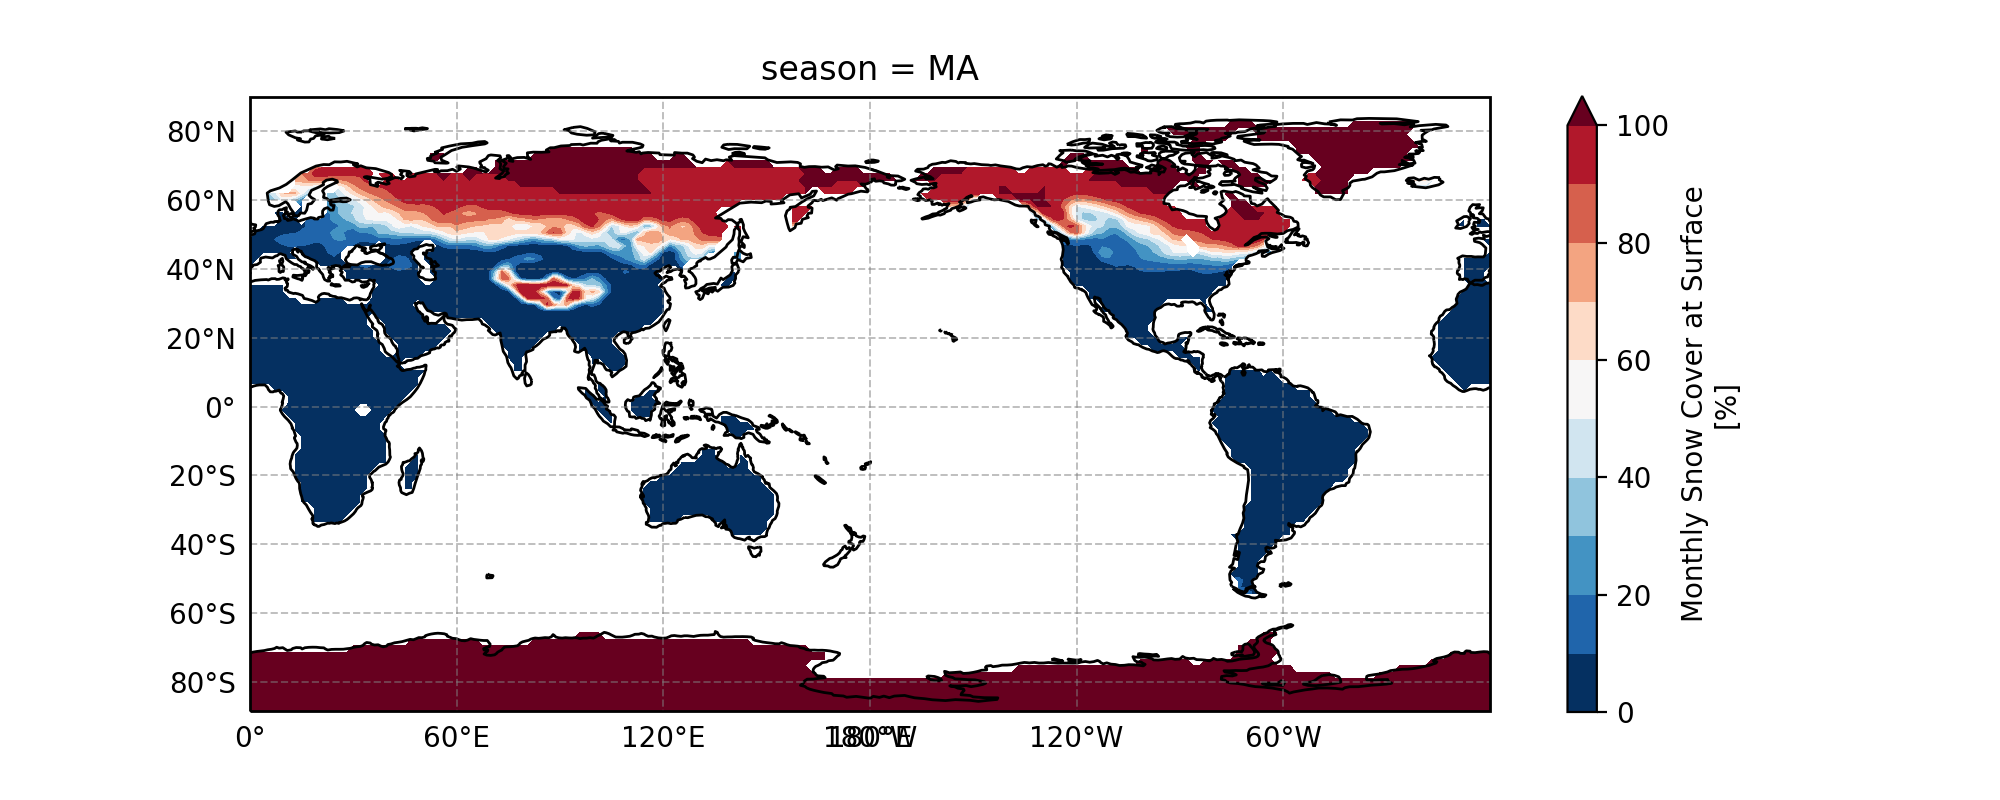

In [190]:
plt.figure(figsize=(10,4))

ax = plt.axes(projection=ccrs.PlateCarree(180))

clim_MA_noaaV2c_cyclic.plot.contourf(
    ax=ax, transform=ccrs.PlateCarree(), levels=np.arange(0,110,10), cmap='RdBu_r',
#     cbar_kwargs={'orientation':'horizontal'}
)

ax.coastlines()
# ax.set_aspect('auto')

# https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

Overlap of longitude labels. Possible to fix by putting them by hand (a bit tricky).

## Loading NCEP/CFSR reanalysis (0.5° x 0.5°)

In [195]:
!ncdump -h '/home/msantola/TP_CLiMAF/SharedObsSnow/snc_ncarcfsr_1979-2016_0.5x0.5.nc'

netcdf snc_ncarcfsr_1979-2016_0.5x0.5 {
dimensions:
	lon = 720 ;
	lat = 361 ;
	time = UNLIMITED ; // (456 currently)
variables:
	double lon(lon) ;
		lon:axis = "X" ;
		lon:units = "degree_east" ;
	double lat(lat) ;
		lat:axis = "Y" ;
		lat:units = "degree_north" ;
	double time(time) ;
		time:standard_name = "time" ;
		time:units = "seconds since 1970-01-01 00:00:00" ;
		time:calendar = "standard" ;
	double snowc(time, lat, lon) ;
		snowc:units = "%" ;

// global attributes:
		:CDI = "Climate Data Interface version 1.6.4 (http://code.zmaw.de/projects/cdi)" ;
		:Conventions = "CF-1.4" ;
		:CDO = "Climate Data Operators version 1.6.4 (http://code.zmaw.de/projects/cdo)" ;
		:history = "Fri Feb 22 12:18:12 2019: ncatted -a units,lon,m,c,degree_east -a units,lat,m,c,degree_north snc_ncarcfsr_1979-2016_0.5x0.5.nc\nThu Mar 01 12:47:47 2018: cdo mergetime 1979.nc 1980.nc 1981.nc 1982.nc 1983.nc 1984.nc 1985.nc 1986.nc 1987.nc 1988.nc 1989.nc 1990.nc 1991.nc 1992.nc 1993.nc 1994.nc 1995.nc 1996.

In [203]:
file_path = '/home/msantola/TP_CLiMAF/SharedObsSnow/snc_ncarcfsr_1979-2016_0.5x0.5.nc'

ds = xr.open_dataset(file_path)
ds

<xarray.Dataset>
Dimensions:  (lat: 361, lon: 720, time: 456)
Coordinates:
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
  * lat      (lat) float64 90.0 89.5 89.0 88.5 88.0 ... -88.5 -89.0 -89.5 -90.0
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2016-12-01
Data variables:
    snowc    (time, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.6.4 (http://code.zmaw.de/p...
    Conventions:  CF-1.4
    CDO:          Climate Data Operators version 1.6.4 (http://code.zmaw.de/p...
    history:      Fri Feb 22 12:18:12 2019: ncatted -a units,lon,m,c,degree_e...

In [204]:
snowc_mon_ncar = ds.snowc.sel(time=slice(y_start, y_end))
snowc_mon_ncar

<xarray.DataArray 'snowc' (time: 372, lat: 361, lon: 720)>
[96690240 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
  * lat      (lat) float64 90.0 89.5 89.0 88.5 88.0 ... -88.5 -89.0 -89.5 -90.0
  * time     (time) datetime64[ns] 1984-01-01 1984-02-01 ... 2014-12-01
Attributes:
    units:    %

In [224]:
clim_MA_ncar = u.custom_season_clim(snowc_mon_ncar, 'MA', calendar='standard')
clim_MA_ncar

<xarray.DataArray (lat: 361, lon: 720)>
array([[9999., 9999., 9999., ..., 9999., 9999., 9999.],
       [9999., 9999., 9999., ..., 9999., 9999., 9999.],
       [9999., 9999., 9999., ..., 9999., 9999., 9999.],
       ...,
       [ 100.,  100.,  100., ...,  100.,  100.,  100.],
       [ 100.,  100.,  100., ...,  100.,  100.,  100.],
       [ 100.,  100.,  100., ...,  100.,  100.,  100.]])
Coordinates:
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
  * lat      (lat) float64 90.0 89.5 89.0 88.5 88.0 ... -88.5 -89.0 -89.5 -90.0
    season   <U2 'MA'
Attributes:
    units:    %

<IPython.core.display.Javascript object>


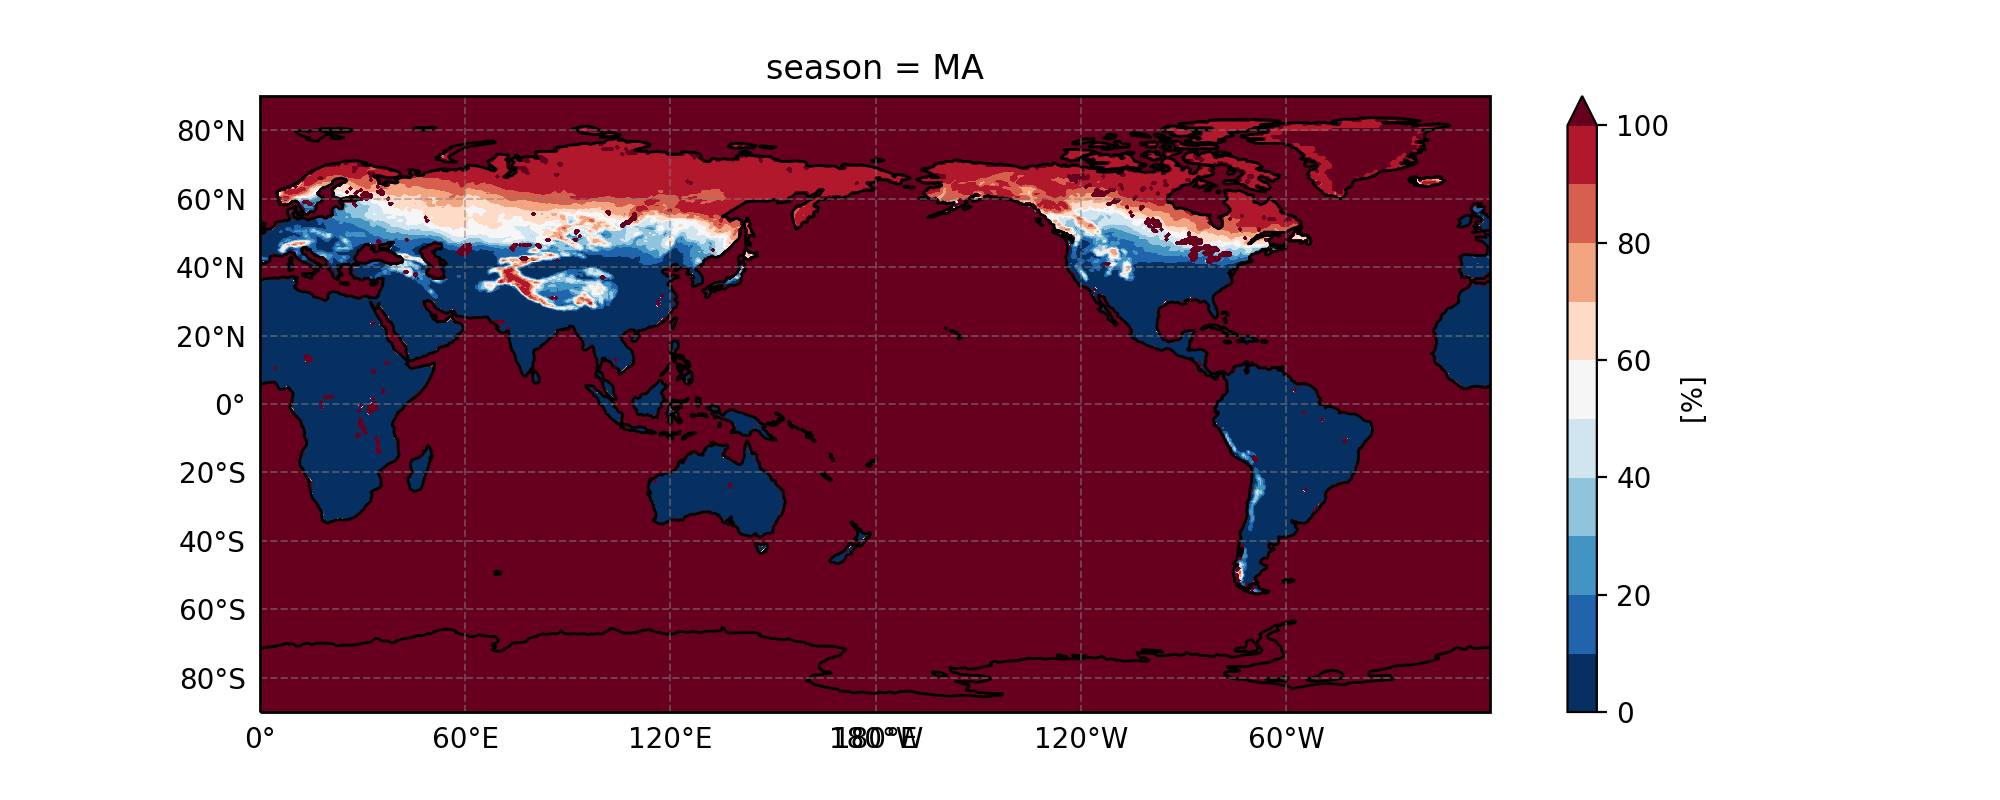

In [209]:
plt.figure(figsize=(10,4))

ax = plt.axes(projection=ccrs.PlateCarree(180))

clim_MA_ncar.plot.contourf(
    ax=ax, transform=ccrs.PlateCarree(), levels=np.arange(0,110,10), cmap='RdBu_r',
#     cbar_kwargs={'orientation':'horizontal'}
)

ax.coastlines()
# ax.set_aspect('auto')

# https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

In [232]:
# Their are many values < 9999.
clim_MA_ncar = clim_MA_ncar.where(clim_MA_ncar<=100)

In [233]:
clim_MA_ncar.max()

<xarray.DataArray ()>
array(99.99999788)
Coordinates:
    season   <U2 'MA'

<IPython.core.display.Javascript object>


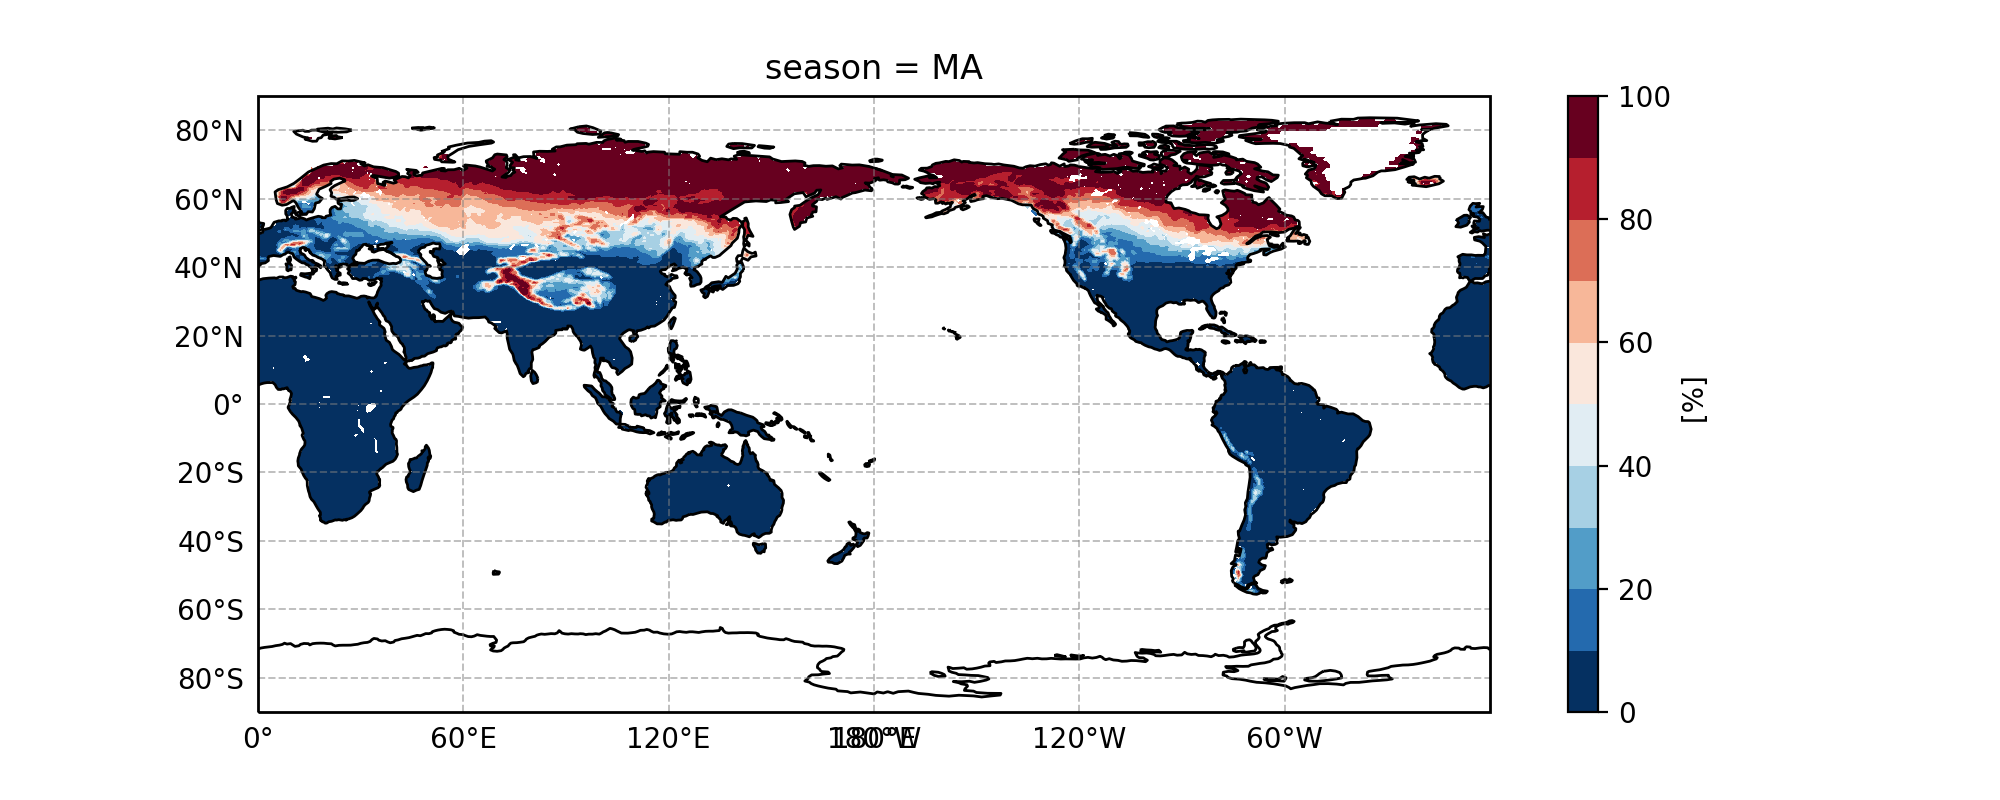

In [234]:
# Values on Greenland and Antartica are >> 100 %, must be missing values?
plt.figure(figsize=(10,4))

ax = plt.axes(projection=ccrs.PlateCarree(180))

clim_MA_ncar.plot.contourf(
    ax=ax, transform=ccrs.PlateCarree(), levels=np.arange(0,110,10), cmap='RdBu_r',
#     cbar_kwargs={'orientation':'horizontal'}
)

ax.coastlines()
ax.set_global()
# ax.set_aspect('auto')

# https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

## Load IPSL-CM6A-LR

In [239]:
ipsl_path = '/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/LImon/snc/gr/latest/'\
                +'snc_LImon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc'

snc_ipsl = xr.open_dataset(ipsl_path).snc.sel(time=slice(y_start,y_end))
snc_ipsl

<xarray.DataArray 'snc' (time: 372, lat: 143, lon: 144)>
[7660224 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1984-01-16T12:00:00 ... 2014-12-16T12:00:00
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

### Compute annual cllimatologies

In [244]:
clim_ipsl = u.clim(snc_ipsl)
clim_ipsl

<xarray.DataArray (lat: 143, lon: 144)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

In [246]:
clim_obs = u.clim(snowc_mon_ncar)
clim_obs = clim_obs.where(clim_obs<=100)
clim_obs

<xarray.DataArray (lat: 361, lon: 720)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])
Coordinates:
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
  * lat      (lat) float64 90.0 89.5 89.0 88.5 88.0 ... -88.5 -89.0 -89.5 -90.0
Attributes:
    units:    %

### Regrid the IPSL grid to the NCAR grid

In [258]:
# Think to put periodic=True for periodic data in longitude!
regridder = xe.Regridder(clim_ipsl, clim_obs, 'bilinear', periodic=True)
regridder

Create weight file: bilinear_143x144_361x720_peri.nc


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_143x144_361x720_peri.nc 
Reuse pre-computed weights? False 
Input grid shape:           (143, 144) 
Output grid shape:          (361, 720) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      True

In [259]:
clim_ipsl_regrid = regridder(clim_ipsl, keep_attrs=True)
clim_ipsl_regrid

<xarray.DataArray (lat: 361, lon: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
  * lat      (lat) float64 90.0 89.5 89.0 88.5 88.0 ... -88.5 -89.0 -89.5 -90.0
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella
    regrid_method:       bilinear

<IPython.core.display.Javascript object>


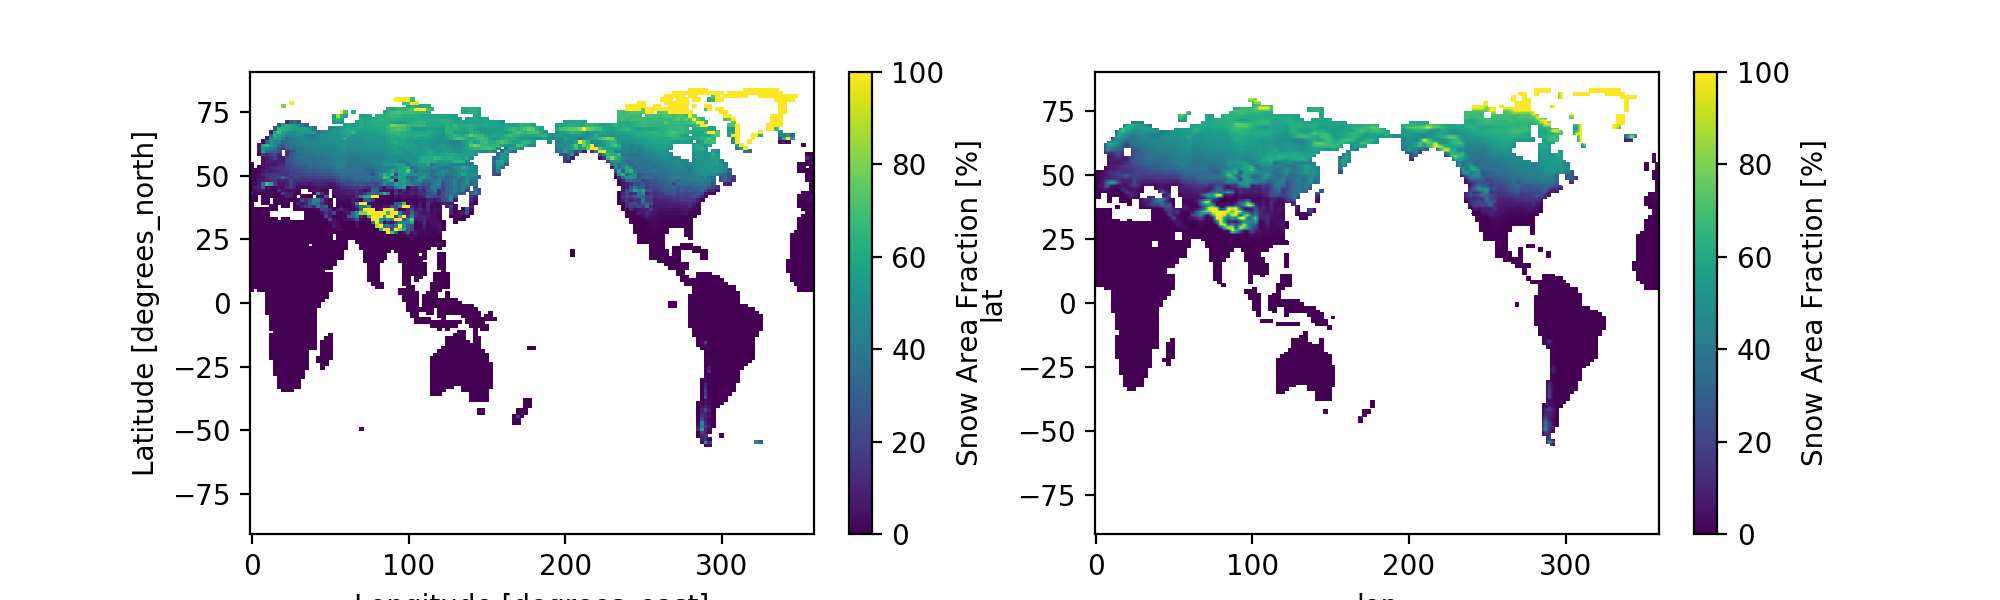

In [260]:
plt.figure(figsize=(10,3))
plt.subplot(121)
clim_ipsl.plot()
plt.subplot(122)
clim_ipsl_regrid.plot()

### Compute the bias

In [263]:
with xr.set_options(keep_attrs=True):
    clim_bias = clim_ipsl_regrid - clim_obs
    
clim_bias

<xarray.DataArray (lat: 361, lon: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
  * lat      (lat) float64 90.0 89.5 89.0 88.5 88.0 ... -88.5 -89.0 -89.5 -90.0
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella
    regrid_method:       bilinear

In [269]:
clim_bias.min()

<xarray.DataArray ()>
array(-68.93281765)

In [270]:
clim_bias.max()

<xarray.DataArray ()>
array(90.31679901)

<IPython.core.display.Javascript object>


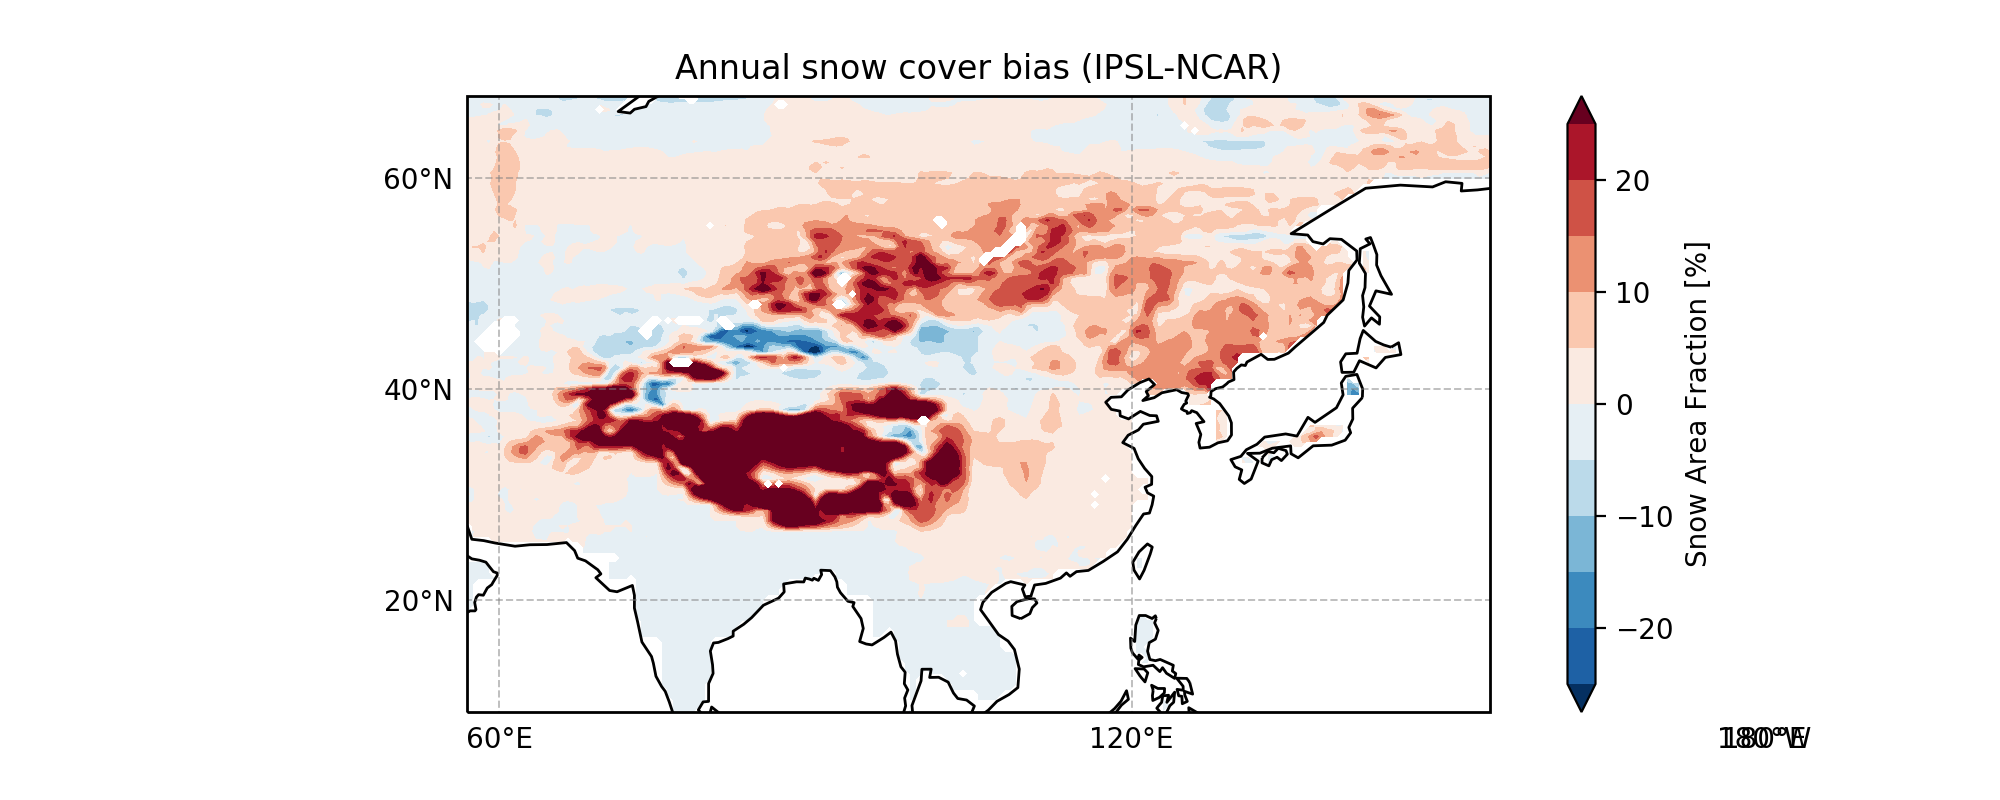

Text(0.5, 1.0, 'Annual snow cover bias (IPSL-NCAR)')

In [285]:
# Values on Greenland and Antartica are >> 100 %, must be missing values?
plt.figure(figsize=(10,4))

ax = plt.axes(projection=ccrs.PlateCarree(180))

clim_bias.plot.contourf(
    ax=ax, transform=ccrs.PlateCarree(), 
#     robust=True
    levels=np.arange(-25,30,5), cmap='RdBu_r',
#     cbar_kwargs={'orientation':'horizontal'}
)

ax.coastlines()
ax.set_global()
# ax.set_aspect('auto')

# https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.title('Annual snow cover bias (IPSL-NCAR)')

## Make climatology on MA

In [45]:
dpm = {'noleap': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       '365_day': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'standard': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'gregorian': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'proleptic_gregorian': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'all_leap': [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       '366_day': [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       '360_day': [0, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]}

In [33]:
def leap_year(year, calendar='standard'):
    """Determine if year is a leap year"""
    leap = False
    if ((calendar in ['standard', 'gregorian',
        'proleptic_gregorian', 'julian']) and
        (year % 4 == 0)):
        leap = True
        if ((calendar == 'proleptic_gregorian') and
            (year % 100 == 0) and
            (year % 400 != 0)):
            leap = False
        elif ((calendar in ['standard', 'gregorian']) and
                 (year % 100 == 0) and (year % 400 != 0) and
                 (year < 1583)):
            leap = False
    return leap

def get_dpm(time, calendar='standard'):
    """
    return a array of days per month corresponding to the months provided in `months`
    """
    month_length = np.zeros(len(time), dtype=np.int)

    cal_days = dpm[calendar]

    for i, (month, year) in enumerate(zip(time.month, time.year)):
        month_length[i] = cal_days[month]
        # Attention erreur sur xarray ? (https://github.com/pydata/xarray/issues/3465)
#         if leap_year(year, calendar=calendar): 
        if leap_year(year, calendar=calendar) and month == 2:
            month_length[i] += 1
    return month_length

In [57]:
# Make a DataArray with the number of days in each month, size = len(time)
month_length = xr.DataArray(get_dpm(da.time.to_index(), calendar='gregorian'),
                            coords=[da.time], name='month_length')

# Calculate the weights by grouping by 'time.season'.
# Conversion to float type ('astype(float)') only necessary for Python 2.x
weights = month_length.groupby('time.season') / month_length.astype(float).groupby('time.season').sum()

# Test that the sum of the weights for each season is 1.0
np.testing.assert_allclose(weights.groupby('time.season').sum().values, np.ones(4))

# Calculate the weighted average
ds_weighted = (da * weights).groupby('time.season').sum(dim='time', skipna=False)

<IPython.core.display.Javascript object>


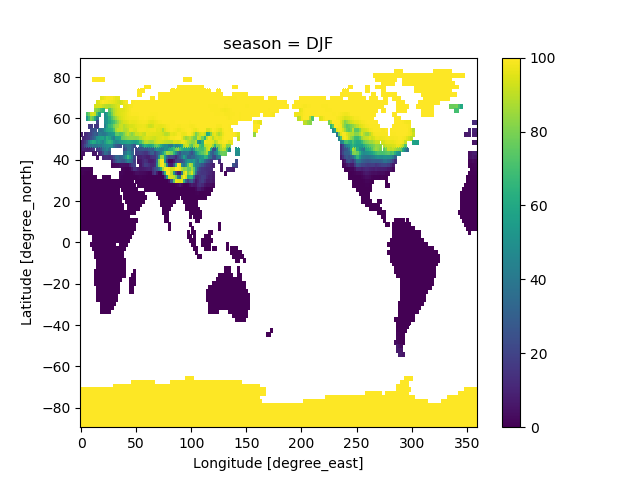

In [61]:
plt.figure()
ds_weighted[0].plot()

In [63]:
test[0]

<xarray.DataArray 'snowc' (lat: 94, lon: 192)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
    season   <U3 'DJF'

In [64]:
ds_weighted[0]

<xarray.DataArray (lat: 94, lon: 192)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
    season   <U3 'DJF'

<IPython.core.display.Javascript object>


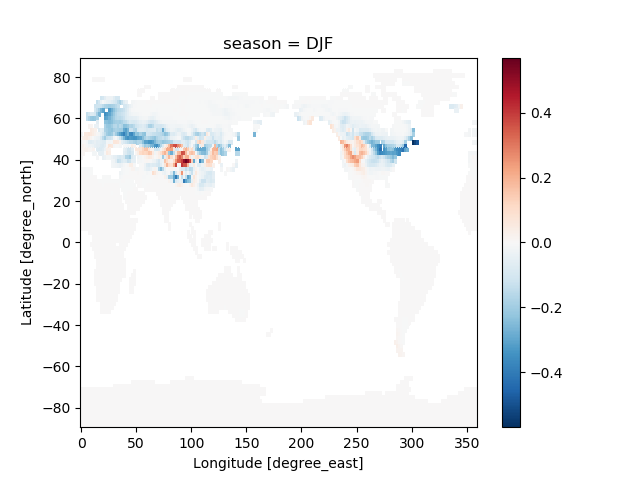

In [62]:
plt.figure()
(ds_weighted[0]-test[0]).plot()